In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.rcParams['figure.figsize'] = (10, 4)

In [15]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

#Xotica Dataset

In [2]:
!gdown 16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta

Downloading...
From: https://drive.google.com/uc?id=16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta
To: /content/rest_vis.csv
100% 13.1k/13.1k [00:00<00:00, 23.6MB/s]


In [3]:
df = pd.read_csv('/content/rest_vis.csv')
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   weekday  517 non-null    object 
 1   holiday  517 non-null    int64  
 2   total    478 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.2+ KB


In [44]:
df.tail(5)

,weekday,holiday,total
date,,,
2017-05-27,Saturday,0,NaN
2017-05-28,Sunday,0,NaN
2017-05-29,Monday,1,NaN
2017-05-30,Tuesday,0,NaN
2017-05-31,Wednesday,0,NaN


In [23]:
517-478

39

In [24]:
train = df.iloc[:436]
test = df.iloc[436:]

In [25]:
print(len(train))
print(len(test))


436
81


<Axes: xlabel='date'>

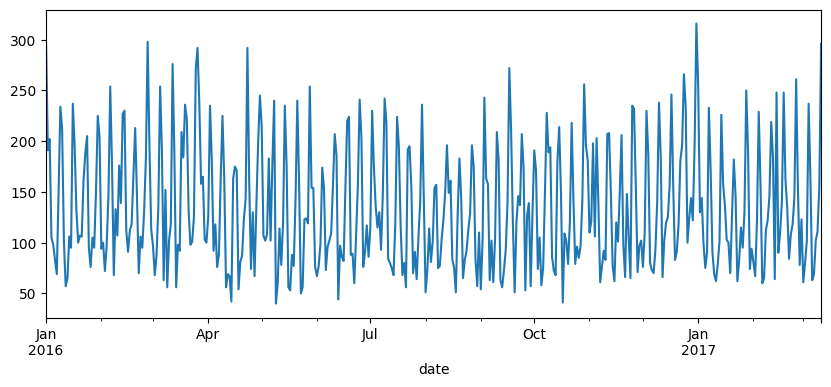

In [26]:
train.total.plot()

In [45]:
model = SARIMAX(train['total'],order=(3,0,3),seasonal_order=(1,0,1,7))
results = model.fit()
fc = results.forecast(42)
performance(test.total[:42],fc)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE : 25.446
RMSE : 32.277
MAPE: 0.208


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


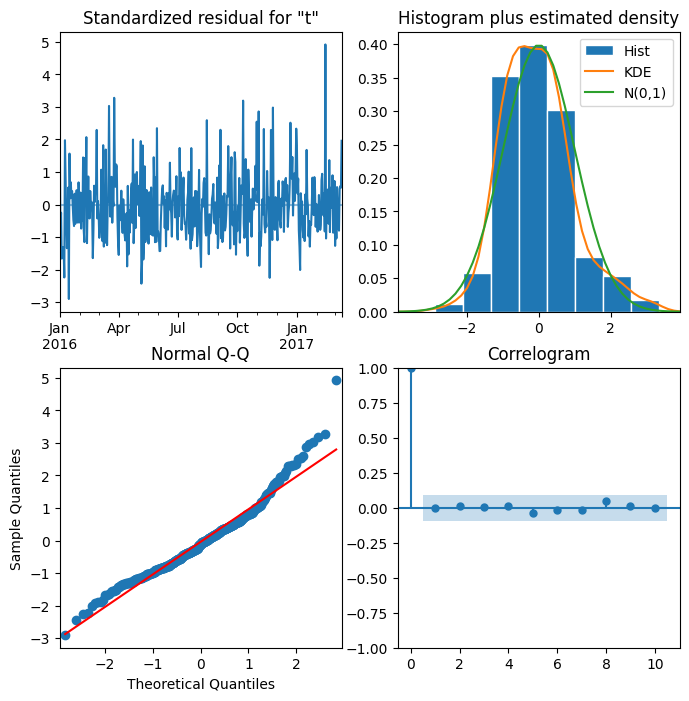

In [46]:
results.plot_diagnostics(figsize=(8,8));

<Axes: xlabel='date'>

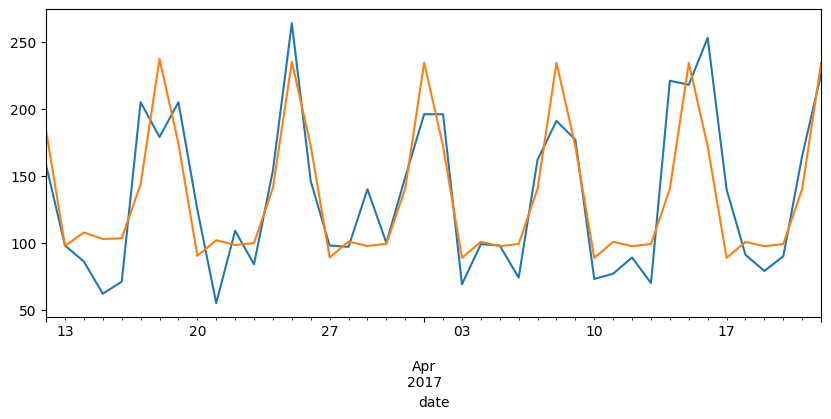

In [41]:
test.total[:42].plot()
fc.plot()

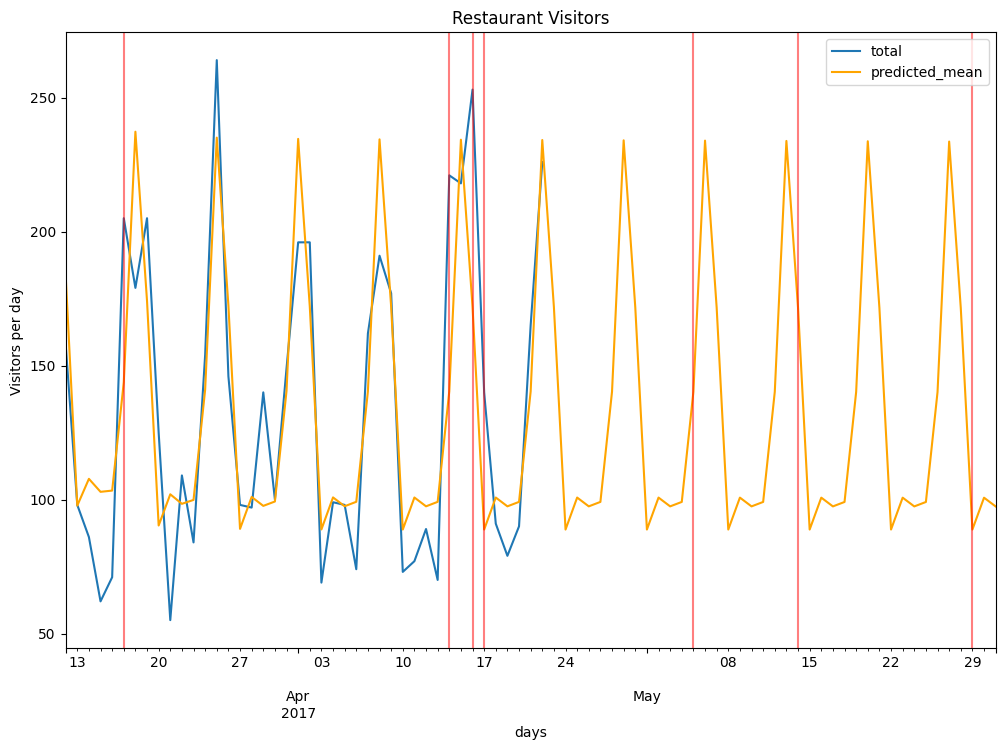

In [42]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end)


# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

In [47]:
model = SARIMAX(train['total'],order=(3,0,3),seasonal_order=(1,0,1,7),exog=train["holiday"])
results = model.fit()
fc = results.forecast(42,exog=test["holiday"][:42])
performance(test.total[:42],fc)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE : 25.557
RMSE : 34.205
MAPE: 0.194


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

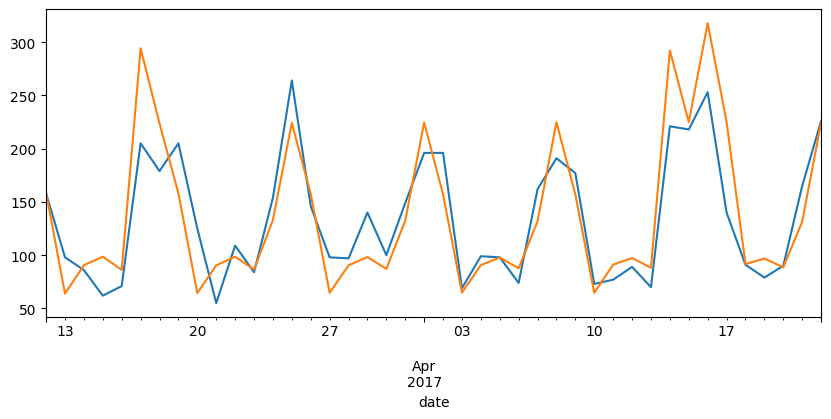

In [48]:
test.total[:42].plot()
fc.plot()

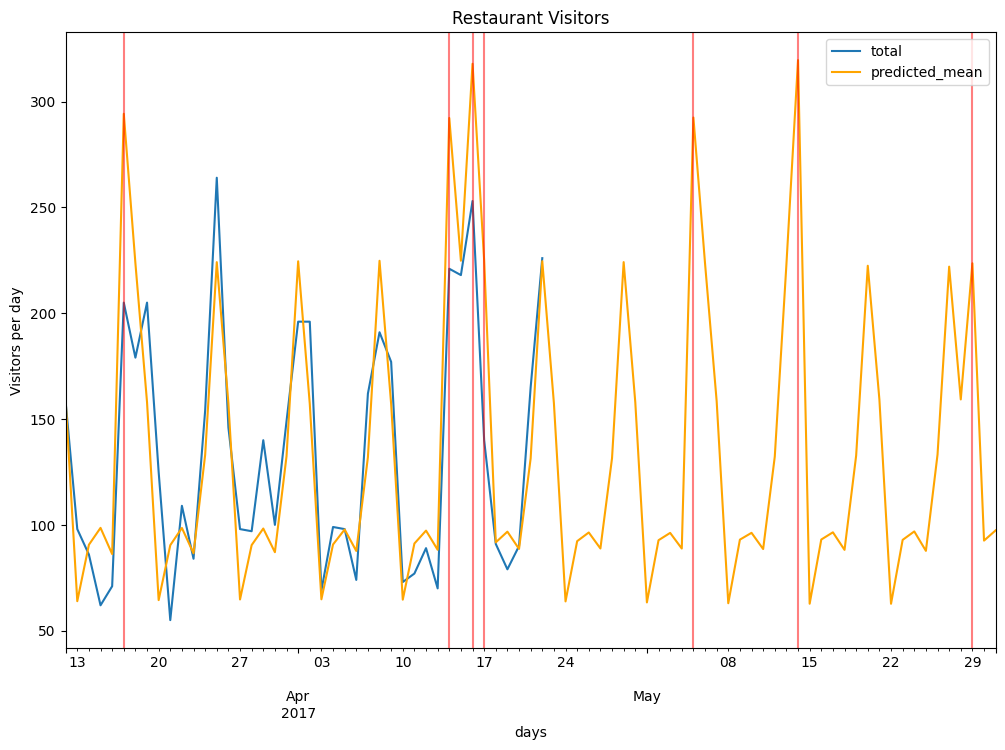

In [49]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end,exog=test["holiday"])


# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

#Time Series Forecasting using Linear Regression

In [50]:
df.head()

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


In [51]:
dfo = df.copy()
#past values
dfo["lag_1"] = dfo["total"].shift(1)
dfo["lag_2"] = dfo["total"].shift(2)
dfo["lag_3"] = dfo["total"].shift(3)

#past seasonal values
dfo["lag_7"] = dfo["total"].shift(7)
dfo["lag_14"] = dfo["total"].shift(14)
dfo["lag_21"] = dfo["total"].shift(21)

In [52]:
dfo.head()

,weekday,holiday,total,lag_1,lag_2,lag_3,lag_7,lag_14,lag_21
date,,,,,,,,,
2016-01-01,Friday,1,296.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,Saturday,0,191.0,296.0,NaN,NaN,NaN,NaN,NaN
2016-01-03,Sunday,0,202.0,191.0,296.0,NaN,NaN,NaN,NaN
2016-01-04,Monday,0,105.0,202.0,191.0,296.0,NaN,NaN,NaN
2016-01-05,Tuesday,0,98.0,105.0,202.0,191.0,NaN,NaN,NaN


In [53]:
def weekend(x):
  if x in ["Saturday","Sunday"]:
    return 1
  else:
    return 0

In [55]:
dfo["isweekend"] = dfo["weekday"].apply(weekend)

In [57]:
dfo

,weekday,holiday,total,lag_1,lag_2,lag_3,lag_7,lag_14,lag_21,isweekend
date,,,,,,,,,,
2016-01-01,Friday,1,296.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2016-01-02,Saturday,0,191.0,296.0,NaN,NaN,NaN,NaN,NaN,1
2016-01-03,Sunday,0,202.0,191.0,296.0,NaN,NaN,NaN,NaN,1
2016-01-04,Monday,0,105.0,202.0,191.0,296.0,NaN,NaN,NaN,0
2016-01-05,Tuesday,0,98.0,105.0,202.0,191.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2017-05-28,Sunday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2017-05-29,Monday,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [64]:
dfo.dropna(inplace=True)

In [67]:
train_x = dfo[["lag_1","lag_2","lag_3","lag_7","lag_14","lag_21","holiday","isweekend"]].iloc[:436]
train_y = dfo["total"].iloc[:436]

In [68]:
test_x = dfo[["lag_1","lag_2","lag_3","lag_7","lag_14","lag_21","holiday","isweekend"]].iloc[436:436+42]
test_y = dfo["total"].iloc[436:436+42]

In [69]:
test_y.tail()

date
2017-04-18     91.0
2017-04-19     79.0
2017-04-20     90.0
2017-04-21    165.0
2017-04-22    226.0
Name: total, dtype: float64

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

# Train and pred
model = LinearRegression()
model.fit(train_x, train_y)
y_pred = pd.Series(model.predict(test_x), index=test_x.index)


In [76]:
mape(test_y,y_pred)

0.14960352000051338

In [77]:
#hw: ADD MORE FEATURES AND TRY XGBOOST

#FB Prophet

In [78]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [79]:
# import prophet
from prophet import Prophet

In [82]:
dfo.reset_index(inplace=True)
dfo.head()

,date,weekday,holiday,total,lag_1,lag_2,lag_3,lag_7,lag_14,lag_21,isweekend
0,2016-01-22,Friday,0,161.0,106.0,107.0,100.0,95.0,149.0,296.0,0
1,2016-01-23,Saturday,0,188.0,161.0,106.0,107.0,237.0,234.0,191.0,1
2,2016-01-24,Sunday,0,205.0,188.0,161.0,106.0,197.0,212.0,202.0,1
3,2016-01-25,Monday,0,95.0,205.0,188.0,161.0,132.0,101.0,105.0,0
4,2016-01-26,Tuesday,0,76.0,95.0,205.0,188.0,100.0,57.0,98.0,0


In [84]:
#Prophet takes is data is a set format
#formatting = [ds,y,holiday] : ds=date,y=total
df1 = dfo[["date","total","holiday"]]
df1["ds"] = df1["date"]
df1["y"] = df1["total"]
df = df1[["ds","y","holiday"]]

<ipython-input-84-b655f1de3a5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ds"] = df1["date"]
<ipython-input-84-b655f1de3a5f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["y"] = df1["total"]


In [87]:
df.tail()

,ds,y,holiday
452,2017-04-18,91.0,0
453,2017-04-19,79.0,0
454,2017-04-20,90.0,0
455,2017-04-21,165.0,0
456,2017-04-22,226.0,0


In [88]:
df[['ds', 'y']][:-39].tail()

,ds,y
413,2017-03-10,155.0
414,2017-03-11,296.0
415,2017-03-12,158.0
416,2017-03-13,98.0
417,2017-03-14,86.0


In [89]:
m = Prophet()
m.fit(df[['ds', 'y']][:-39]) #here we are leaving last 39 observations because we will predict it in 'future'
future = m.make_future_dataframe(periods=39,freq="D")
forecast = m.predict(future)
# fig = m.plot(forecast)
forecast.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwm3itut/g6grv58v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwm3itut/uvxeyod4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17440', 'data', 'file=/tmp/tmpnwm3itut/g6grv58v.json', 'init=/tmp/tmpnwm3itut/uvxeyod4.json', 'output', 'file=/tmp/tmpnwm3itut/prophet_modelfw180ret/prophet_model-20240719172420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
452,2017-04-18,136.402538,55.021397,140.755880,136.181918,136.650818,-37.996129,-37.996129,-37.996129,-37.996129,-37.996129,-37.996129,0.0,0.0,0.0,98.406408
453,2017-04-19,136.436993,58.874408,137.334493,136.202456,136.697443,-38.356531,-38.356531,-38.356531,-38.356531,-38.356531,-38.356531,0.0,0.0,0.0,98.080462
454,2017-04-20,136.471449,60.937673,140.846465,136.225095,136.744009,-32.313560,-32.313560,-32.313560,-32.313560,-32.313560,-32.313560,0.0,0.0,0.0,104.157889
455,2017-04-21,136.505904,106.489157,189.641677,136.245816,136.790868,11.377330,11.377330,11.377330,11.377330,11.377330,11.377330,0.0,0.0,0.0,147.883234
456,2017-04-22,136.540360,193.223039,272.643401,136.273211,136.834972,96.909480,96.909480,96.909480,96.909480,96.909480,96.909480,0.0,0.0,0.0,233.449840


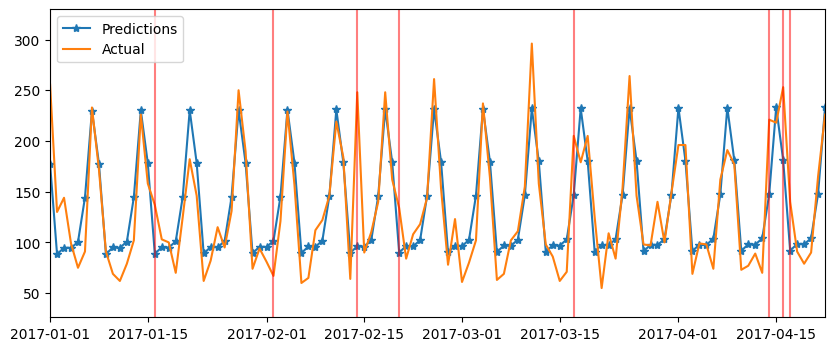

In [90]:
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
for x in df.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
plt.legend()

In [91]:
performance(df['y'][:-39],forecast['yhat'][:-39])

MAE : 23.935
RMSE : 31.617
MAPE: 0.215


In [93]:
model2=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=4)
model2.add_regressor('holiday') #adding holidays data in the model3# model.add_regressor(exog1)
model2.fit(df[:-39])
forecast2 = model2.predict(df)
# fig = model2.plot(forecast2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwm3itut/b8as77me.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwm3itut/wd17upcc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38598', 'data', 'file=/tmp/tmpnwm3itut/b8as77me.json', 'init=/tmp/tmpnwm3itut/wd17upcc.json', 'output', 'file=/tmp/tmpnwm3itut/prophet_modellg9x63e3/prophet_model-20240719173042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:30:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:30:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


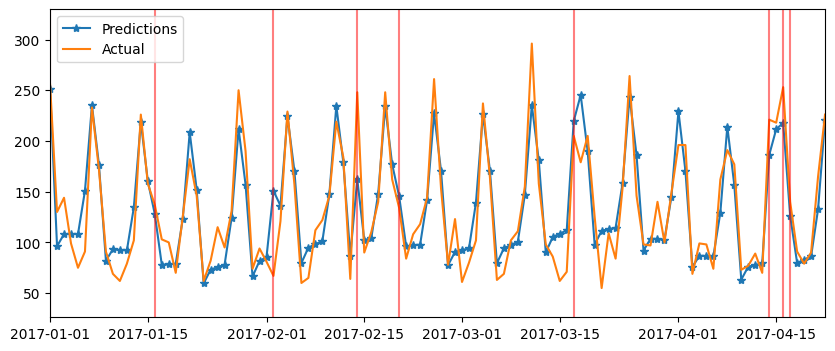

In [94]:
plt.plot(forecast2['ds'], forecast2['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2017-04-22'))
for x in df.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.legend()

In [95]:
performance(df['y'][:-39],forecast2['yhat'][:-39])

MAE : 19.96
RMSE : 25.637
MAPE: 0.182


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwm3itut/gnl9snfl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnwm3itut/t6j_x03v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28439', 'data', 'file=/tmp/tmpnwm3itut/gnl9snfl.json', 'init=/tmp/tmpnwm3itut/t6j_x03v.json', 'output', 'file=/tmp/tmpnwm3itut/prophet_modelxcclnf1l/prophet_model-20240719173333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


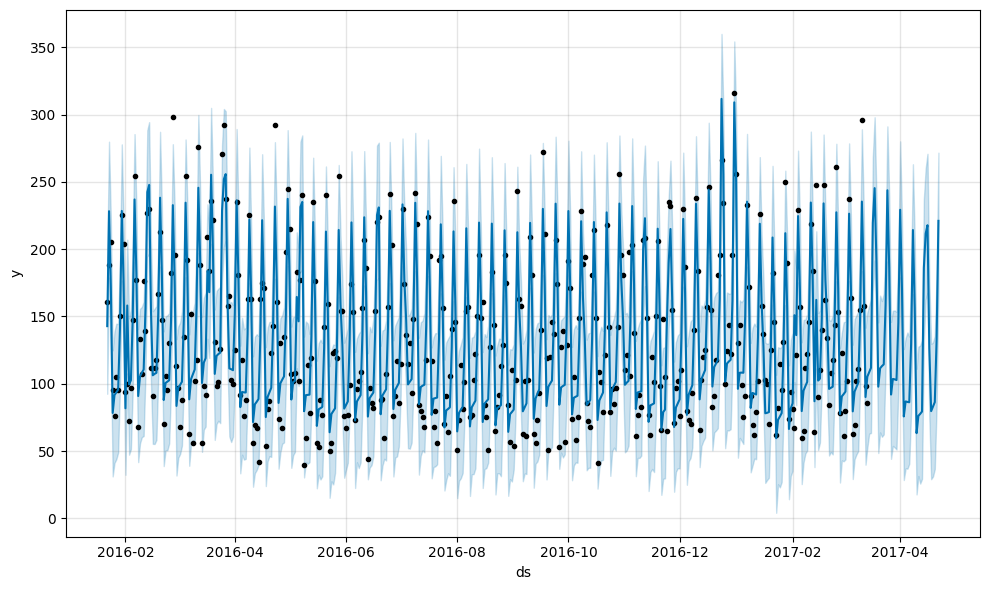

In [96]:
model3=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=4)
model3.add_country_holidays(country_name='US') #adding holidays data in the model2
model3.fit(df[:-39])
future = m.make_future_dataframe(periods=39,freq="D")
forecast3 = model3.predict(df)
fig = model3.plot(forecast2)

In [97]:
performance(df['y'][:-39],forecast3['yhat'][:-39])

MAE : 20.35
RMSE : 27.064
MAPE: 0.181


#Changepoint detection

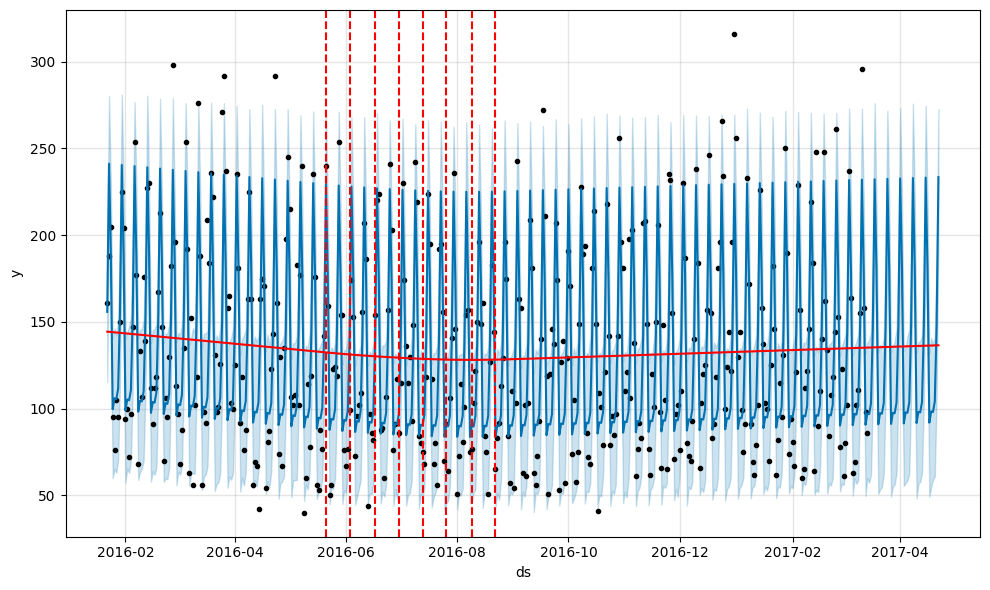

In [98]:
# Python
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)